# Import Libraries & Create Demo Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import acf,pacf

In [5]:
np.random.seed(42)
dates = pd.date_range(start='2022-01-01', periods=730, freq='D')
sales = 50 + 0.1*np.arange(730) + 5*np.sin(2*np.pi*np.arange(730)/30) + np.random.normal(0,2,730)

df = pd.DataFrame({'Date': dates, 'Sales': sales})
df.set_index('Date', inplace=True)

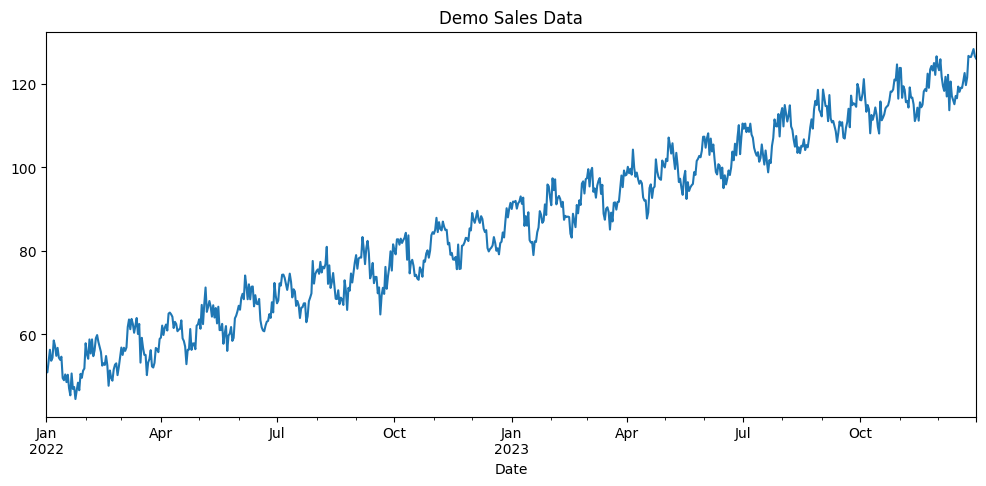

In [6]:
df['Sales'].plot(figsize=(12,5), title='Demo Sales Data')
plt.show()

# AR (AutoRegressive) Model

In [7]:
train = df['Sales'][:700]
test = df['Sales'][700:]

In [8]:
ar_model = AutoReg(train, lags=5).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Sales   No. Observations:                  700
Model:                     AutoReg(5)   Log Likelihood               -1653.229
Method:               Conditional MLE   S.D. of innovations              2.611
Date:                Sat, 14 Feb 2026   AIC                           3320.458
Time:                        15:46:34   BIC                           3352.265
Sample:                    01-06-2022   HQIC                          3332.757
                         - 12-01-2023                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5084      0.426      1.193      0.233      -0.327       1.343
Sales.L1       0.5435      0.038     14.341      0.000       0.469       0.618
Sales.L2       0.3574      0.043      8.309      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [9]:
ar_pred = ar_model.predict(start=len(train), end=len(train)+len(test)-1)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


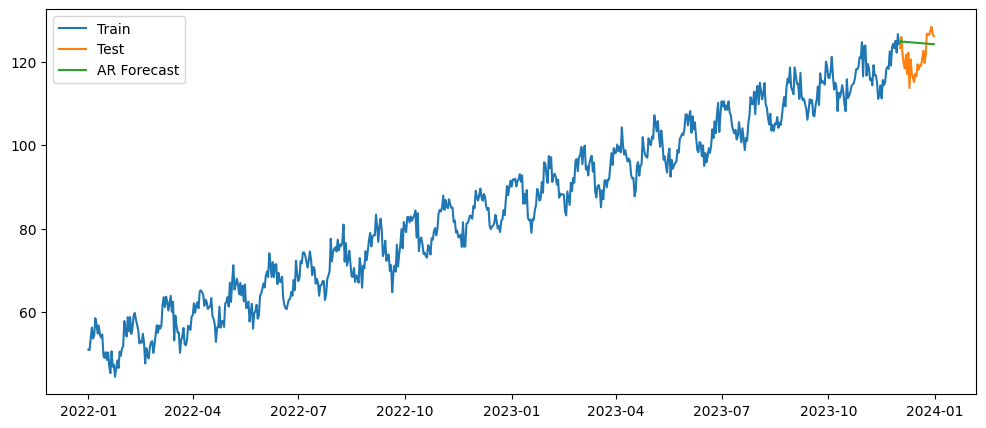

In [10]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ar_pred, label='AR Forecast')
plt.legend()
plt.show()

# MA (Moving Average) Concept

In [11]:
ma_model = ARIMA(train, order=(0,0,1)).fit()
ma_pred = ma_model.predict(start=len(train), end=len(train)+len(test)-1)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


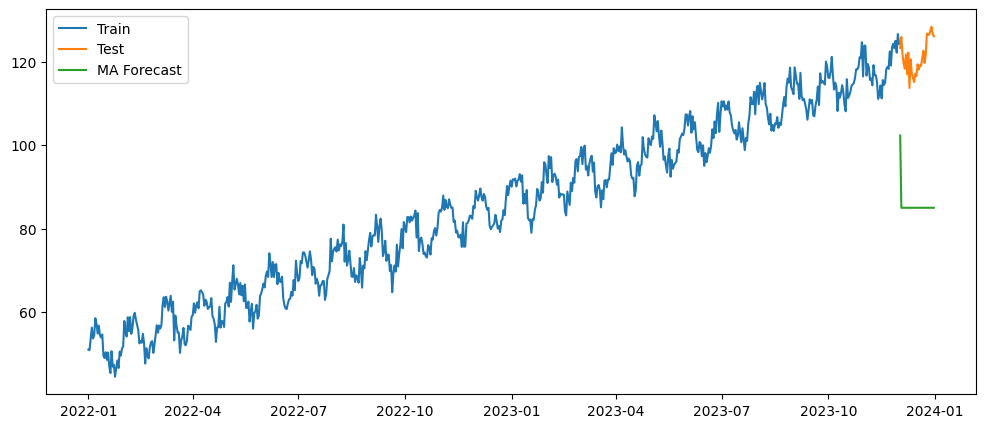

In [12]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ma_pred, label='MA Forecast')
plt.legend()
plt.show()

# ARIMA (AutoReg + Integrated + MA)

In [13]:
arima_model = ARIMA(train, order=(5,1,1)).fit()
arima_pred = arima_model.predict(start=len(train), end=len(train)+len(test)-1, typ='levels')

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


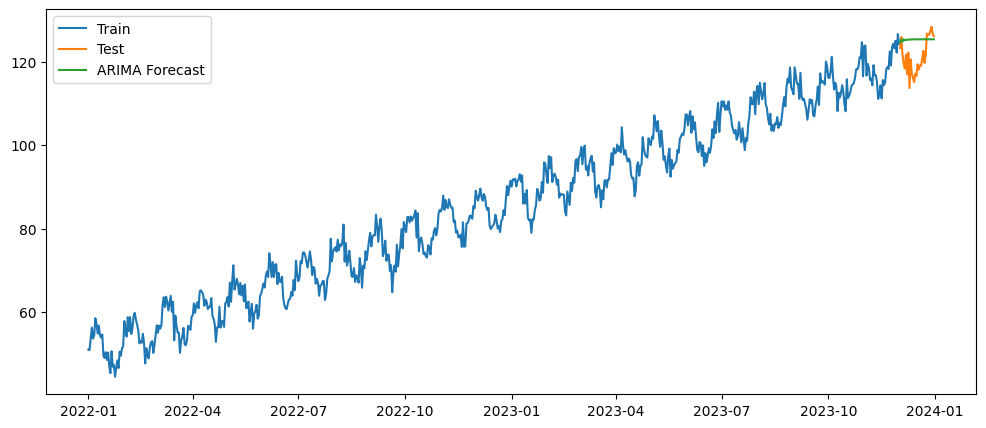

In [14]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, arima_pred, label='ARIMA Forecast')
plt.legend()
plt.show()

# Exponential Smoothing (Holt-Winters)

In [15]:
hw_model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=30).fit()
hw_pred = hw_model.forecast(len(test))

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


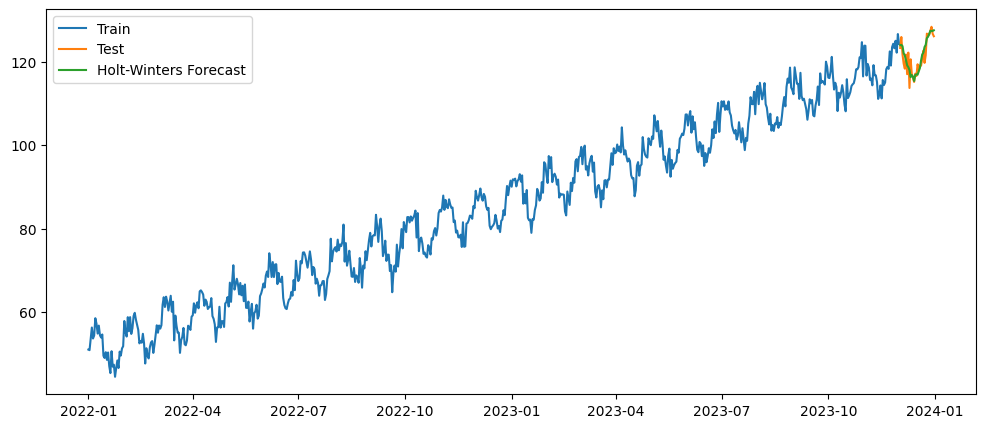

In [16]:
plt.figure(figsize=(12,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, hw_pred, label='Holt-Winters Forecast')
plt.legend()
plt.show()